In [2]:
import numpy as np
import matplotlib.image as mping
import matplotlib.pyplot as plt
import cv2

image shape (576, 1024, 3)


<function matplotlib.pyplot.imshow(X: 'ArrayLike | PIL.Image.Image', cmap: 'str | Colormap | None' = None, norm: 'str | Normalize | None' = None, *, aspect: "Literal['equal', 'auto'] | float | None" = None, interpolation: 'str | None' = None, alpha: 'float | ArrayLike | None' = None, vmin: 'float | None' = None, vmax: 'float | None' = None, origin: "Literal['upper', 'lower'] | None" = None, extent: 'tuple[float, float, float, float] | None' = None, interpolation_stage: "Literal['data', 'rgba'] | None" = None, filternorm: 'bool' = True, filterrad: 'float' = 4.0, resample: 'bool | None' = None, url: 'str | None' = None, data=None, **kwargs) -> 'AxesImage'>

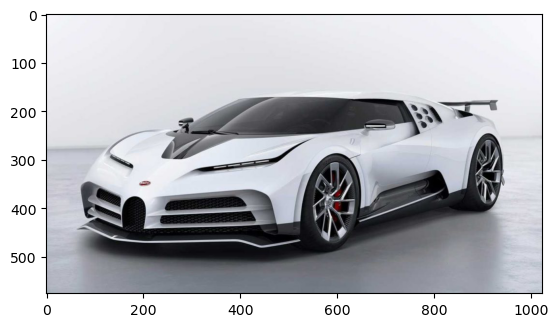

In [14]:
#이미지 표시
image = mping.imread('bugatti-centodieci.jpg')

#이미지 크기
print('image shape', image.shape)
plt.imshow(image)
plt.imshow

In [25]:
#grayscale 변환
gray = cv2.cvtColor(image, cv2.COLOR_RGB_GRAY)
plt.imshow(gray, cmap='gray')
plt.show() 


AttributeError: module 'cv2' has no attribute 'COLOR_RGB_GRAY'

In [21]:
x, y = 100, 100
print('Pixel value at (100,100):',gray[x,y])

print('Pixel value range:', gray.min(),'to', gray.max())

print('Pixel value mean:', gray.mean())
print('Pixel value std:', gray.std())

NameError: name 'gray' is not defined

In [22]:
plt.hist(gray.ravel(), bins=256, range=(gray.min(), gray.max()),
         color='gray', alpha=0.7)
plt.title('Histogram of pixel values')
plt.xlabel('Pixel vlue')
plt.ylabel('Frequnecy')
plt.grid()
plt.show()


NameError: name 'gray' is not defined

In [ ]:
#RGB채널을 분리
#r,g,b = cv2.split(hsv) # 간단한 방법
r = image[:,:,0]
g = image[:,:,1]
b = image[:,:,2]

fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(20, 10))
ax1.imshow(r, cmap='gray')
ax1.set_title('Red channel')
ax1.axis("off")
ax2.imshow(r, cmap='gray')
ax2.set_title('Green channel')
ax2.axis("off")
ax3.imshow(r, cmap='gray')
ax3.set_title('Blue channel')
ax3.axis("off")
plt.show()

In [ ]:
hsv = cv2.cvtColor(image, cv2.COLOR_RGB2HSV)
plt.imshow(hsv)
plt.show()

In [ ]:
#HSV채널을 분리
#h,s,v = cv2.split(hsv) # 간단한 방법
h = hsv[:,:,0]
s = hsv[:,:,1]
v = hsv[:,:,2]

#각 채널의 시각을 그립니다.
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(20, 10))
ax1.imshow(h, cmap='gray')
ax1.set_title('Hue channel')
ax2.imshow(s, cmap='gray')
ax2.set_title('Stauration channel')
ax3.imshow(v, cmap='gray')
ax3.set_title('Value channel')
plt.show()

In [ ]:
#Green SCreen
green_screen = cv2.imread('accident.jpg')
green_screen_rgb = cv2.cvtColor(green_screen, cv2.COLOR_BGR2RGB)



In [ ]:
#임계값 설정

lower_green = np.array([0,100,0])
upper_green = np.array([100,255,100])

#마스크 생성 
mask = cv2.inRange(green_screen_rgb, lower_green, upper_green)
plt.imshow(mask, cmap='gray')
plt.title('Mask')
plt.show()

In [ ]:
#마스크 사용하고 배경을 제거합니다
masked_image = np.copy(green_screen_rgb)
masked_image[mask !=0] = [0,0,0]
plt.imshow(masked_image)
plt.title('Mask Image')
plt.show()

In [ ]:
#마스크 이미지에서 새로운 배경을 추가합니다

background_rgb = np.copy(image)

background_rgb = cv2.resize(background_rgb, (masked_image, shape[1], masked_image.shape[0]))
masked_image